# Del 07: Strojno učenje: Pregled Scikit-Learn metodologij

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_rects(N, ax, textprop={}, plt_=plt):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

In [3]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

## Introducing Scikit-Learn

### Data Representation in Scikit-Learn

#### Data as table

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Features matrix

#### Target array

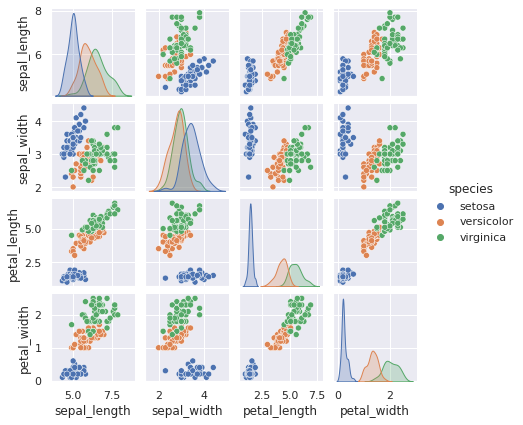

In [6]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [7]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

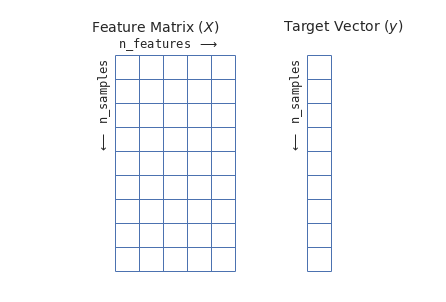

In [9]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)
plt.show()

### Scikit-Learn's Estimator API

## Hyperparameters and Model Validation

### Model Validation

#### Model validation the wrong way

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [12]:
model.fit(X, y)
y_model = model.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

#### Model validation via Holdout sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)


model.fit(X1, y1)


y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

#### Model validation via cross-validation

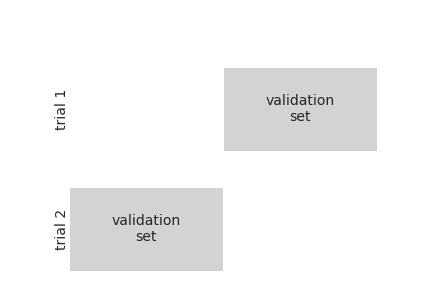

In [16]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14), plt_=plt)
plt.show()

In [17]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

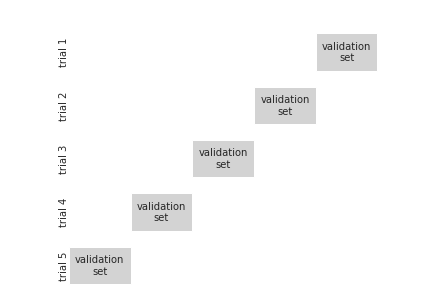

In [18]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(5, ax, textprop=dict(size=10))
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Selecting the Best Model

#### The Bias-variance trade-off

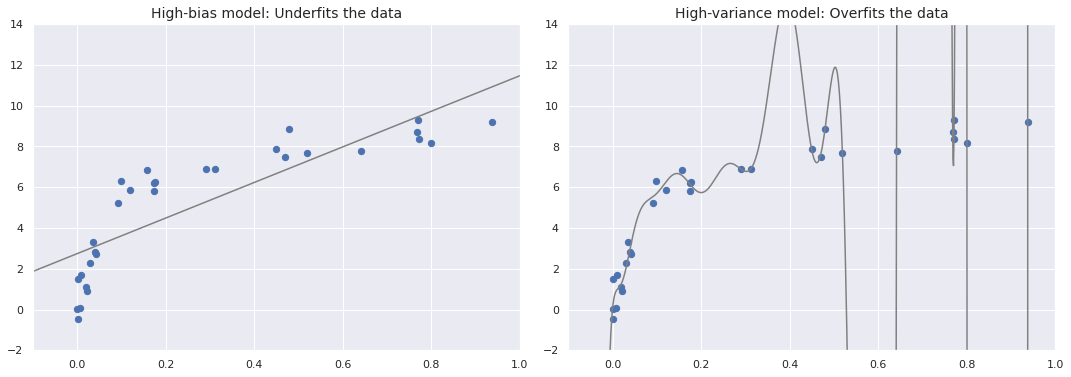

In [20]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
plt.show()

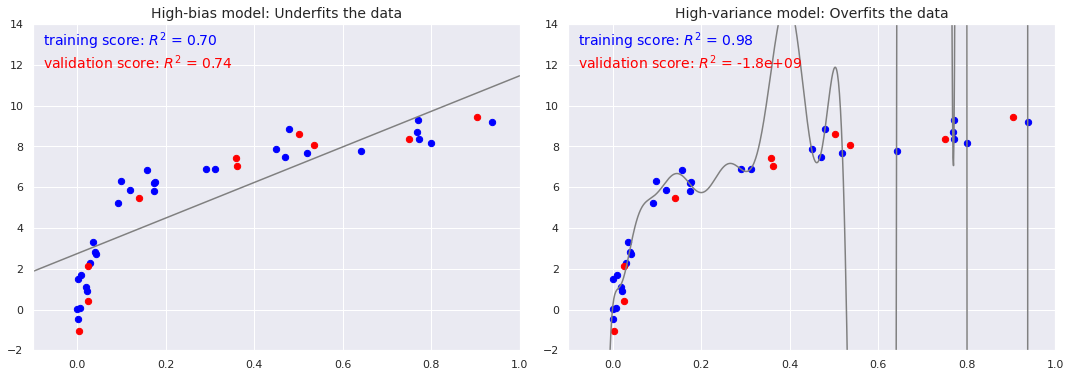

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')
plt.show()

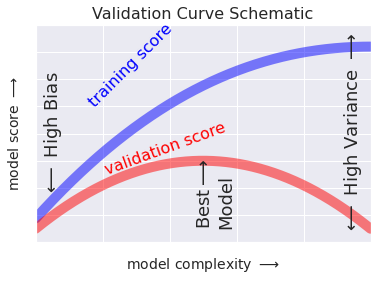

In [22]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [24]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

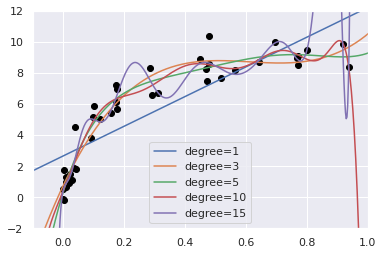

In [28]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5, 10, 15]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

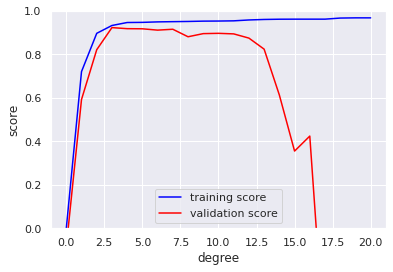

In [29]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

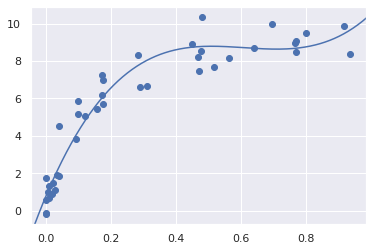

In [30]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);
plt.show()

### Learning Curves

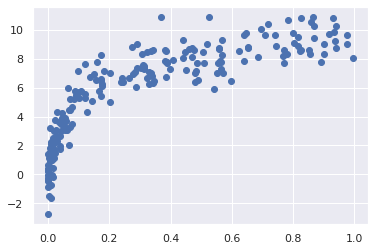

In [31]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);
plt.show()

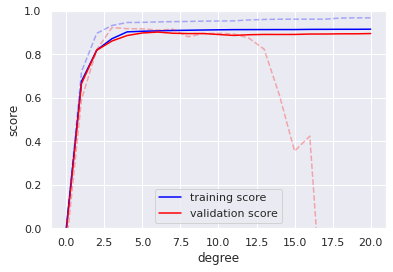

In [32]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
plt.show()

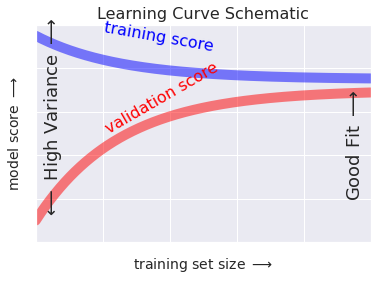

In [33]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)
plt.show()

#### Learning curves in Scikit-Learn

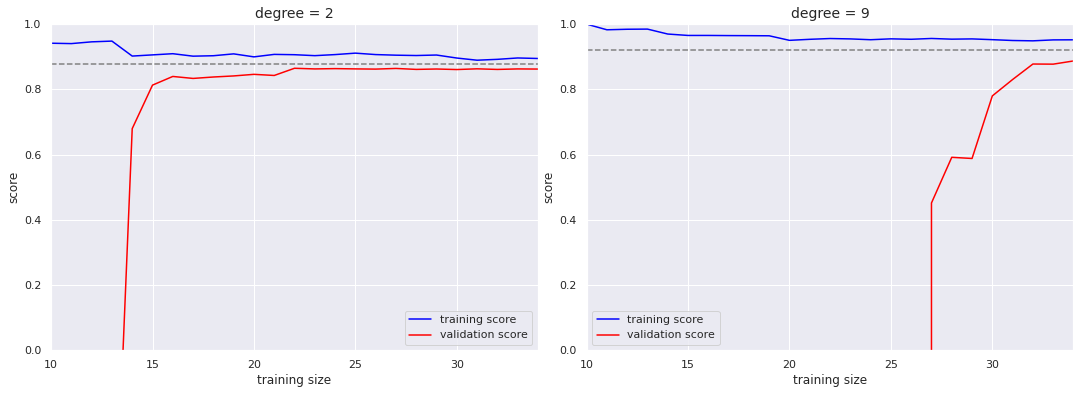

In [34]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

plt.show()

### Validation in Practice: Grid Search

In [35]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [36]:
grid.fit(X, y);

In [37]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

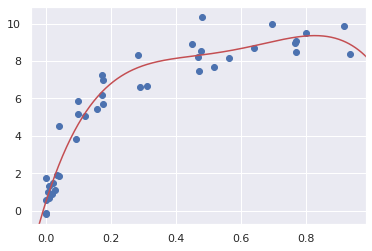

In [38]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, c='r');
plt.axis(lim);
plt.show()

## Feature Engineering

### Categorical Features

In [39]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [41]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

In [42]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [43]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [46]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

#### Categorical encoding using Label-Encoding and One-Hot-Encoder

#### Label Encoding in Python

In [47]:
# import required libraries
import pandas as pd
import numpy as np

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [48]:
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df


,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [50]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


#### One-Hot Encoding in Python

In [51]:
import pandas as pd
import numpy as np

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"])

# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])


# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types']]).toarray())

# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,0,1,2,3,4,5,6
0,Arch,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Derived Features

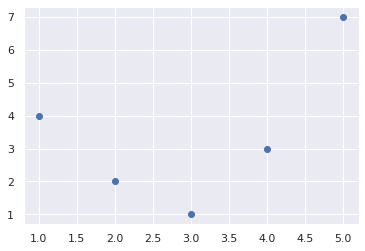

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

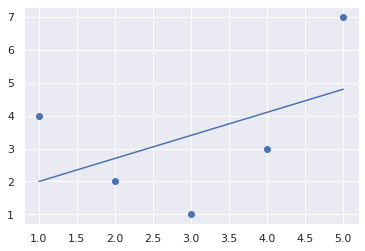

In [56]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


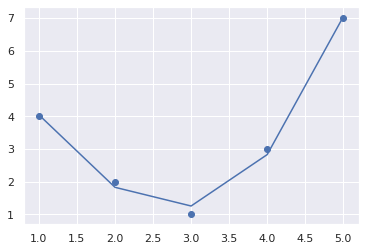

In [58]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

### Imputation of Missing Data

In [59]:
from numpy import nan

X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [60]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = imputer.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [61]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

In [62]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [63]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## Primer: Predicting Credit Card Approvals


In [64]:
import pandas as pd

In [65]:
cc_apps = pd.read_csv('data/cc_approvals.data', header=None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [66]:
len(cc_apps)

690

In [67]:
column_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
                'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 
                'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

In [68]:
cc_apps.columns = column_names

In [69]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [70]:
cc_apps.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [71]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [73]:
#cc_apps.tail(50)

In [80]:
for col in cc_apps:
    if cc_apps[col].dtypes == 'object':
        uniques = cc_apps[col].unique()
        #print(f'{col}: {uniques}')

In [84]:
import numpy as np

cc_apps = cc_apps.replace('?', np.nan)
cc_apps['Age'] = cc_apps['Age'].astype('float')
pd.DataFrame({'missing_vals': cc_apps.isnull().sum(), 'd_types': cc_apps.dtypes})

,missing_vals,d_types
Gender,12,object
Age,12,float64
Debt,0,float64
Married,6,object
BankCustomer,6,object
EducationLevel,9,object
Ethnicity,9,object
YearsEmployed,0,float64
PriorDefault,0,object
Employed,0,object


In [86]:
cc_apps.fillna(cc_apps.mean(), inplace=True)
pd.DataFrame({'missing_vals': cc_apps.isnull().sum(), 'd_types': cc_apps.dtypes})

,missing_vals,d_types
Gender,12,object
Age,0,float64
Debt,0,float64
Married,6,object
BankCustomer,6,object
EducationLevel,9,object
Ethnicity,9,object
YearsEmployed,0,float64
PriorDefault,0,object
Employed,0,object


In [87]:
for col in cc_apps:
    if cc_apps[col].dtype == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

In [88]:
cc_apps.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cc_apps:
    if cc_apps[col].dtype == 'object':
        cc_apps[col] = le.fit_transform(cc_apps[col])

In [90]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [93]:
clean_cc_apps = cc_apps.drop(columns=['ZipCode', 'DriversLicense']).copy()
clean_cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,0,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,2,0,0


In [97]:
for col in clean_cc_apps:
    if clean_cc_apps[col].dtypes == 'int' and col not in ['Income', 'ApprovalStatus']:
        uniques = clean_cc_apps[col].unique()
        print(f'{col}: {uniques}')

Gender: [1 0]
Married: [2 3 0 1]
BankCustomer: [1 3 0 2]
EducationLevel: [13 11 10 12  3  9  2  4 14  7  5  0  6  8  1]
Ethnicity: [8 4 1 3 5 9 0 7 2 6]
PriorDefault: [1 0]
Employed: [1 0]
CreditScore: [ 1  6  0  5  7 10  3 17  2  9  8 15 11 12 40 23  4 20 67 14 16 13 19]
Citizen: [0 2 1]


In [98]:
one_hot_encoder_columns = ['Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'Citizen']

In [104]:
from sklearn.preprocessing import OneHotEncoder

encoded_cols = clean_cc_apps[one_hot_encoder_columns]

# preverimo število končnih stolpcev
print(f'Number of encoded cols: {sum(len(encoded_cols[col].unique()) for col in one_hot_encoder_columns)}')

Number of encoded cols: 36


In [105]:
enc = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(enc.fit_transform(encoded_cols))

In [106]:
encoded_cols.shape

(690, 36)

In [107]:
encoded_cols.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [108]:
clean_cc_apps = clean_cc_apps.drop(columns=one_hot_encoder_columns)
clean_cc_apps = clean_cc_apps.join(encoded_cols)

In [109]:
clean_cc_apps.head()

,Gender,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,ApprovalStatus,0,...,26,27,28,29,30,31,32,33,34,35
0,1,30.83,0.000,1.25,1,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,58.67,4.460,3.04,1,1,6,560,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,24.50,0.500,1.50,1,0,0,824,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,27.83,1.540,3.75,1,1,5,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,20.17,5.625,1.71,1,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [110]:
from sklearn.model_selection import train_test_split

In [114]:
X_columns = clean_cc_apps.drop(columns=['ApprovalStatus']).columns

In [115]:
X = clean_cc_apps[X_columns]
y = clean_cc_apps['ApprovalStatus']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
X_train[:3]

,Gender,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,0,1,...,26,27,28,29,30,31,32,33,34,35
382,0,24.33,2.50,4.50,0,0,0,456,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137,1,33.58,2.75,4.25,1,1,6,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
346,1,32.25,1.50,0.25,0,0,0,122,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler(feature_range=(0,1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [121]:
#rescaledX_train[:3]

### Napoved

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [125]:
logreg.score(rescaledX_test, y_test) *100

84.21052631578947

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
y_pred = logreg.predict(rescaledX_test)
mat = confusion_matrix(y_test, y_pred)
mat

array([[ 92,  11],
       [ 25, 100]])

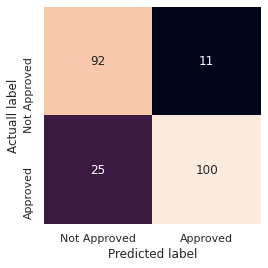

In [128]:
import seaborn as sns

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])

plt.xlabel('Predicted label')
plt.ylabel('Actuall label')

plt.show()

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg">

In [130]:
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol=tol, max_iter=max_iter)
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

In [131]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

In [132]:
rescaledX = scaler.fit_transform(X)
grid_model_result = grid_model.fit(rescaledX, y)

In [133]:
grid_model_result.best_score_

0.8420289855072463

In [134]:
grid_model_result.best_params_

{'max_iter': 100, 'tol': 0.01}